# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

requests.get(btc_url)
requests.get(eth_url)

btc_response_data = requests.get(btc_url)
eth_response_data = requests.get(eth_url)

btc_content = btc_response_data.content
eth_content = eth_response_data.content

In [5]:
#Format Data as JSON
btc_content = btc_response_data.json()
eth_content = eth_response_data.json()

print(btc_content)
print(eth_content)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18824381, 'total_supply': 18824381, 'max_supply': 21000000, 'quotes': {'USD': {'price': 44799.0, 'volume_24h': 34025569516, 'market_cap': 845108396220, 'percentage_change_1h': -0.0118683316219098, 'percentage_change_24h': 3.38140190159957, 'percentage_change_7d': -7.0305101863368, 'percent_change_1h': -0.0118683316219098, 'percent_change_24h': 3.38140190159957, 'percent_change_7d': -7.0305101863368}}, 'last_updated': 1632435814}}, 'metadata': {'timestamp': 1632435814, 'num_cryptocurrencies': 3105, 'error': None}}
{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 117646981, 'total_supply': 117646981, 'max_supply': 0, 'quotes': {'USD': {'price': 3158.78, 'volume_24h': 20170028326, 'market_cap': 372825992138, 'percentage_change_1h': 0.229437973995762, 'percentage_change_24h': 3.65508460580601

In [7]:
# Fetch current BTC & ETH prices
btc_price = btc_content['data']['1']['quotes']['USD']['price']
eth_price = eth_content['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $53758.80
The current value of your 5.3 ETH is $16741.53


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret ***Do I only do this once in the notebook?***
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_API_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [10]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Format current date as ISO format
start_date = pd.Timestamp("2016-09-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-17", tz="America/New_York").isoformat()

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
stock_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Preview DataFrame
stock_prices.dropna().head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-09-28 00:00:00-04:00  109.58  109.72  109.51  109.680  1553324.0  249.73   
2017-09-29 00:00:00-04:00  109.74  109.77  109.54  109.640  2969204.0  250.34   
2017-10-02 00:00:00-04:00  109.43  109.47  109.33  109.425  3840216.0  251.49   
2017-10-03 00:00:00-04:00  109.46  109.54  109.40  109.520  2243369.0  252.46   
2017-10-04 00:00:00-04:00  109.56  109.57  109.41  109.500  2130907.0  252.69   

                                                                 
                             high       low   close      volume  
time                                                             
2017-09-28 00:00:00-04:00  250.44  249.6300  250.34  25577234.0  
2017-09-29 00:00:00-04:00  251.32  250.1300  251.20  41410208.0  
2017-10-02 00:00:00-04:00  252.30  251.2926  252.29  37469184.0  
2017-10-03 00:00:00-04:00  252.89  252.2300  252.85  33875099.0  
2017-10-04 00:00:00-04:00  253.44  252.5600  253.16  30217246.0

In [11]:
# Pick AGG and SPY close prices ***What is the difference between this and closing prices?
agg_closing_prices = stock_prices["AGG"]["close"][1] 

spy_closing_prices = stock_prices["SPY"]["close"][1]

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_closing_prices}")

print(f"Current SPY closing price: ${spy_closing_prices}")

Current AGG closing price: $109.68
Current SPY closing price: $250.34


In [12]:
# Compute the current value of shares
my_spy_value = my_spy * spy_closing_prices

my_agg_value = my_agg * agg_closing_prices

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $12517.00
The current value of your 200 AGG shares is $21936.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_household_income = 12000

# Consolidate financial assets data
saving_data = [my_btc_value + my_eth_value,
               my_spy_value + my_agg_value
              ]
# Create savings DataFrame
df_savings = pd.DataFrame(saving_data, columns=['Amount'], index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

Amount
Crypto  70500.334
Shares  34453.000

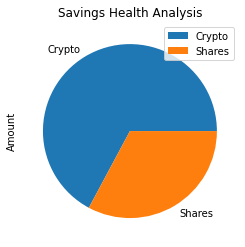

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Savings Health Analysis");

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings

total_savings = emergency_fund + my_btc_value + my_eth_value + my_spy_value + my_agg_value

# Validate saving health

if total_savings > emergency_fund:
    print(f"Congratulations You Have More Than Enough Money Saved!")
elif total_savings == emergency_fund:
    print(f"Congratulations! You Have Enough Money Saved!")
else:
    print(f"You Need To Be Saving More!")

Congratulations You Have More Than Enough Money Saved!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-19', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# Set Alpaca API key and secret
alpaca_api_key="ALPACA_API_KEY"
alpaca_secret_key="ALPACA_SECRET_KEY"

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-09-28 00:00:00-04:00  109.58  109.72  109.51  109.680  1553324  249.73   
2017-09-29 00:00:00-04:00  109.74  109.77  109.54  109.640  2969204  250.34   
2017-10-02 00:00:00-04:00  109.43  109.47  109.33  109.425  3840216  251.49   
2017-10-03 00:00:00-04:00  109.46  109.54  109.40  109.520  2243369  252.46   
2017-10-04 00:00:00-04:00  109.56  109.57  109.41  109.500  2130907  252.69   

                                                               
                             high       low   close    volume  
time                                                           
2017-09-28 00:00:00-04:00  250.44  249.6300  250.34  25577234  
2017-09-29 00:00:00-04:00  251.32  250.1300  251.20  41410208  
2017-10-02 00:00:00-04:00  252.30  251.2926  252.29  37469184  
2017-10-03 00:00:00-04:00  252.89  252.2300  252.85  33875099  
2017-10-04 00:00:00-04:00  253.44  252.5600  253.16  30217246

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_RTMP = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30)

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_RTMP.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\charl\Fintech-Consultancy\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1         2          3         4          5         6    \
0     1.000000   1.000000  1.000000   1.000000  1.000000   1.000000  1.000000   
1     0.998208   1.000692  1.007070   1.003466  1.010893   0.998043  0.990820   
2     1.002864   1.005106  1.005054   1.016695  1.029666   0.993150  0.984663   
3     0.998810   1.001787  1.008781   1.021495  1.033300   1.002206  0.993400   
4     0.978461   1.010740  1.025044   1.020676  1.031029   1.010053  0.992309   
...        ...        ...       ...        ...       ...        ...       ...   
7556  9.175696  18.959329  6.520180  31.115724  1.913932  35.855890  8.948898   
7557  9.196946  19.142876  6.496987  30.775613  1.870311  35.997814  9.005576   
7558  9.195204  19.216329  6.451677  30.599750  1.907981  35.951708  8.925039   
7559  9.166072  19.152691  6.423342  31.112717  1.909381  36.265126  8.948810   
7560  9.086183  19.163826  6.401745  30.986259  1.896145  36.336460  8.959211   

           7          8         9    ...       490        491       492  \
0     1.000000   1.000000  1.000000  ...  1.000000   1.000000  1.000000   
1     1.011374   1.005387  1.001531  ...  0.995226   1.002885  0.997889   
2     1.003728   1.015579  1.000550  ...  1.007821   0.992811  0.999438   
3     0.998222   1.019574  0.998270  ...  1.013458   0.989010  0.987096   
4     0.999799   1.020515  1.008200  ...  1.005790   1.006103  0.984427   
...        ...        ...       ...  ...       ...        ...       ...   
7556  4.362512  39.193973  9.647309  ...  8.243444  19.759460  9.134750   
7557  4.377646  39.187548  9.703089  ...  8.276248  19.687608  9.138885   
7558  4.432305  38.931209  9.661938  ...  8.315792  19.668858  9.110680   
7559  4.468302  38.961946  9.688303  ...  8.279728  19.675440  9.182204   
7560  4.442831  39.187833  9.616044  ...  8.164254  19.845416  9.184293   

            493        494       495       496        497        498  \
0      1.000000   1.000000  1.000000  1.000000   1.000000   1.000000   
1      1.006409   0.997299  0.997469  0.998732   1.003019   1.008891   
2      1.006534   0.996846  0.989878  0.997497   0.996036   1.001366   
3      1.002404   0.985675  1.003555  1.001542   0.988244   1.001761   
4      1.003921   0.981102  1.010785  1.007041   0.992204   1.002965   
...         ...        ...       ...       ...        ...        ...   
7556  10.077829  13.041026  4.100466  4.283789  21.125420  14.160202   
7557  10.185310  12.970805  4.129814  4.299043  21.394892  14.195743   
7558  10.219118  12.897141  4.114633  4.282161  21.024729  14.178690   
7559  10.223444  12.889151  4.092834  4.276697  20.866683  14.287644   
7560  10.253990  12.827062  4.106969  4.283457  20.981853  14.207986   

            499  
0      1.000000  
1      1.001032  
2      0.994095  
3      0.982515  
4      0.993363  
...         ...  
7556  20.549168  
7557  20.484210  
7558  20.371791  
7559  20.542664  
7560  20.335257  

[7561 rows x 500 columns]

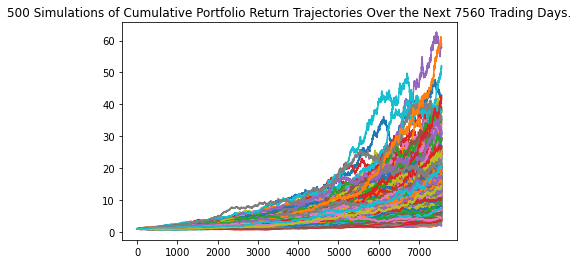

In [20]:
# Plot simulation outcomes
line_plot = MC_RTMP.plot_simulation()

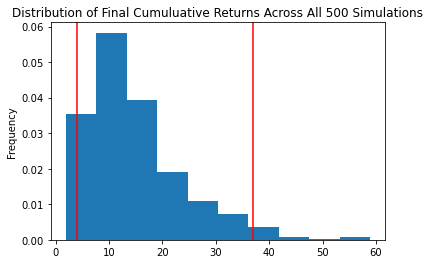

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_RTMP.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results

simulated_returns_data = MC_RTMP.summarize_cumulative_return()

# Print summary statistics
print(simulated_returns_data)

count           500.000000
mean             14.725697
std               8.885649
min               1.896145
25%               8.211022
50%              12.603750
75%              18.684398
max              58.887134
95% CI Lower      4.005040
95% CI Upper     36.926579
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investment
ci_lower = round(simulated_returns_data[8]*20000,2)
ci_upper = round(simulated_returns_data[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
       f" over the next 30 years will end within in the range of"
       f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80100.8 and $738531.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(simulated_returns_data[8]*20000,2)
ci_upper = round(simulated_returns_data[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $80100.8 and $738531.58


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_5_yr_return = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_yr_return.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\charl\Fintech-Consultancy\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1          2          3         4         5    \
0      1.000000   1.000000   1.000000   1.000000  1.000000  1.000000   
1      0.999951   1.004262   0.994739   0.986026  0.999651  0.990472   
2      1.011283   1.009577   1.002722   0.979893  1.010193  0.992183   
3      1.020506   1.022897   1.001215   0.986622  1.007378  0.999378   
4      1.012546   1.029517   0.998117   0.993288  1.000372  1.007655   
...         ...        ...        ...        ...       ...       ...   
7556  16.666490  18.746439  10.976186  21.696942  9.765476  4.768925   
7557  16.489045  18.729769  10.995276  21.665325  9.727748  4.839120   
7558  16.592633  18.579728  11.051067  21.531279  9.791322  4.826196   
7559  16.534961  18.603910  11.023116  21.725277  9.857724  4.848245   
7560  16.665329  18.678573  11.047796  21.693179  9.935776  4.858752   

            6         7         8          9    ...       490        491  \
0      1.000000  1.000000  1.000000   1.000000  ...  1.000000   1.000000   
1      1.002250  0.994358  0.994994   0.994656  ...  1.002419   1.003061   
2      1.014554  0.995043  0.999860   1.007573  ...  1.001115   1.006423   
3      1.010814  1.000591  1.003374   0.996344  ...  1.005670   0.999625   
4      1.014694  1.005227  1.004257   0.982923  ...  1.000481   0.996477   
...         ...       ...       ...        ...  ...       ...        ...   
7556   9.967227  9.687852  6.625436  23.666733  ...  6.512586  19.155067   
7557   9.952830  9.553798  6.654873  23.370505  ...  6.518247  19.195908   
7558   9.935138  9.559816  6.707642  23.550680  ...  6.526651  19.103769   
7559   9.949326  9.566350  6.730940  23.715838  ...  6.546527  18.894051   
7560  10.004617  9.704939  6.732326  24.028837  ...  6.552262  18.839904   

            492       493       494        495        496        497  \
0      1.000000  1.000000  1.000000   1.000000   1.000000   1.000000   
1      0.999190  1.003198  1.003846   0.998250   1.003892   0.996820   
2      0.999091  1.009561  1.006963   0.995610   1.016418   0.991389   
3      0.999786  1.012240  1.007528   0.987145   1.013538   0.992482   
4      1.001849  1.021096  1.017468   0.993485   1.013296   0.994001   
...         ...       ...       ...        ...        ...        ...   
7556  13.911861  3.434750  3.895661  18.255244  14.496047  15.840039   
7557  13.835434  3.424097  3.904295  18.413187  14.590056  15.764916   
7558  13.776431  3.412786  3.896915  18.530970  14.535182  15.879818   
7559  13.663585  3.436449  3.912620  18.441550  14.485956  15.954127   
7560  13.635350  3.421805  3.963923  18.355319  14.670959  16.054845   

            498       499  
0      1.000000  1.000000  
1      0.999293  0.992470  
2      0.989899  1.002467  
3      0.997688  1.007523  
4      1.004341  1.013342  
...         ...       ...  
7556  16.737064  8.670556  
7557  16.866344  8.624128  
7558  16.807905  8.584733  
7559  17.001321  8.591879  
7560  17.164289  8.606881  

[7561 rows x 500 columns]

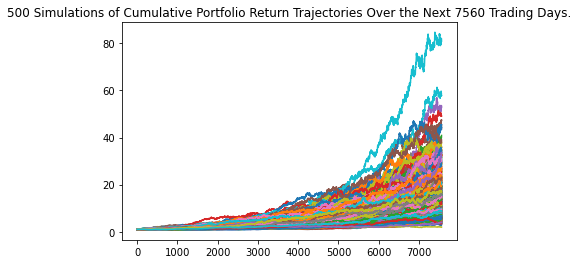

In [29]:
# Plot simulation outcomes
line_plot = MC_5_yr_return.plot_simulation()

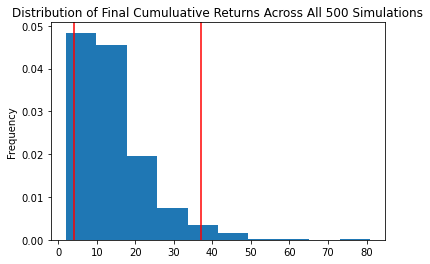

In [30]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_yr_return.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_5yr_returns = MC_5_yr_return.summarize_cumulative_return()

# Print summary statistics
print(simulated_5yr_returns)

count           500.000000
mean             14.454564
std               9.271289
min               1.956334
25%               8.113802
50%              12.269449
75%              18.378583
max              80.944243
95% CI Lower      3.962955
95% CI Upper     36.959275
Name: 7560, dtype: float64


In [32]:
# Set initial investment
initial_investment_5yr = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(simulated_5yr_returns[8]*60000,2)
ci_upper_five = round(simulated_5yr_returns[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $237777.33 and $2217556.52


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

MC_10_yr_return = MCSimulation(
    portfolio_data= df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252 * 10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_yr_return.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\charl\Fintech-Consultancy\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.998386  0.990876  0.989602  0.997890  0.997329  1.001675  1.010918   
2     0.995350  1.002688  0.995144  1.001045  1.003329  1.006487  1.009854   
3     0.988494  1.005024  0.999143  0.997310  1.010533  1.009927  1.000428   
4     0.996148  1.006719  1.002307  0.992571  0.999825  1.010946  1.001329   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.718032  2.598950  2.418141  3.745789  2.857507  3.262340  2.091457   
2517  1.703949  2.604538  2.434294  3.770004  2.895033  3.326775  2.108681   
2518  1.708739  2.622398  2.438160  3.747273  2.904239  3.338162  2.115845   
2519  1.695257  2.625413  2.415595  3.755911  2.870962  3.310617  2.092498   
2520  1.696663  2.597277  2.420824  3.757097  2.839537  3.323317  2.103970   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.993230  1.001453  1.004030  ...  1.006693  0.989507  1.013666   
2     0.999985  0.991445  1.013885  ...  1.015484  0.988492  1.015765   
3     1.002202  0.977793  1.022887  ...  1.010020  0.990876  1.006264   
4     1.006361  0.986138  1.022313  ...  1.013645  0.986762  1.010494   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.733859  2.070756  2.992409  ...  2.428099  2.559798  3.600479   
2517  2.726762  2.055469  2.984760  ...  2.422407  2.551309  3.625890   
2518  2.738382  2.034904  2.978367  ...  2.428293  2.543320  3.663309   
2519  2.746900  2.005448  2.957139  ...  2.440797  2.540796  3.612080   
2520  2.743880  2.017743  2.979141  ...  2.465830  2.567700  3.554619   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.008953  0.986425  1.016518  1.005425  0.991585  1.000763  1.011372  
2     1.014728  0.987888  1.011169  1.012065  0.999504  1.005870  1.007235  
3     1.017994  0.977485  1.017967  1.014004  0.999867  1.011274  1.004829  
4     1.006941  0.966166  1.024728  1.008065  0.996407  1.023801  1.014057  
...        ...       ...       ...       ...       ...       ...       ...  
2516  3.554095  2.520191  0.813912  1.936522  2.882596  3.406981  2.277629  
2517  3.538426  2.501118  0.814835  1.948507  2.902416  3.387858  2.292471  
2518  3.538518  2.500275  0.809492  1.941861  2.908066  3.385667  2.279352  
2519  3.526285  2.505006  0.801120  1.921674  2.918277  3.399936  2.293874  
2520  3.495876  2.523115  0.803117  1.928980  2.928950  3.448666  2.295803  

[2521 rows x 500 columns]

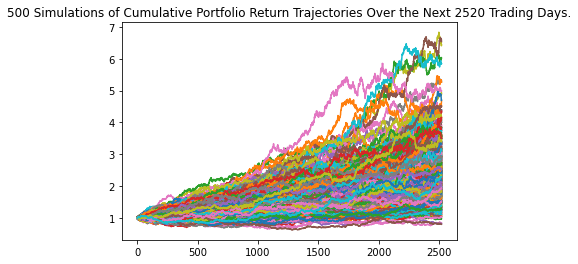

In [35]:
# Plot simulation outcomes
line_plot = MC_10_yr_return.plot_simulation()

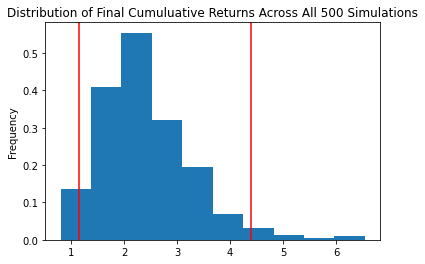

In [36]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_yr_return.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
simulated_10yr_returns = MC_10_yr_return.summarize_cumulative_return()

# Print summary statistics
print(simulated_10yr_returns)

count           500.000000
mean              2.424026
std               0.855580
min               0.803117
25%               1.853928
50%               2.303428
75%               2.887263
max               6.541800
95% CI Lower      1.149327
95% CI Upper      4.391952
Name: 2520, dtype: float64


In [38]:
# Set initial investment
initial_investment_10yr = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(simulated_10yr_returns[8]*60000,2)
ci_upper_ten = round(simulated_10yr_returns[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yr} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $68959.62 and $263517.09
